# Clone, get data and load waveforms from a simulation to the CoRe DB

Illustrates the use of the watpy objects to work with the CoRe DB.

SB 09/2021 
AG 05/2023 
AG 07/2024
core@uni-jena.de


## 0. Start

Clone the repo somewhere and install the package:

```
git clone https://git.tpi.uni-jena.de/core/watpy.git
cd watpy
python setup.py install
```

Now we will be cloning part of the CoRe DB from the gitlab repository

https://core-gitlfs.tpi.uni-jena.de/core_database

so prepare a folder for those data:

```
mkdir CoRe_DB_clone # for local clone of the CoRe DB
```

or

In [4]:
import os
os.makedirs('./CoRe_DB_clone', exist_ok=True) 

## 1. Clone the CoRe DB

In [5]:
from watpy.coredb.coredb import *

Initialize a `CoRe_db()` object by specifying the path where we would like the CoRe DB to be initialized. 
The initialization will either clone the special repository `core_database_index` (and only this one) in the given path or syncronize it to (i.e. pull) the latest version in case the repository already exists.

In [6]:
db_path = './CoRe_DB_clone/'
cdb = CoRe_db(db_path)

Index found, updating...

git-pull core_database_index ...
 
done!
 Found R01
Found THC:0012
 Found R01
Found THC:0015
 Found R02
 Found R01
Found THC:0071
 Found R01
Found THC:0017
 Found R02
 Found R01
Found THC:0041
skip core_database_index, not a DB key
 Found R02
 Found R01
Found THC:0048
 Found R01
Found THC:0066
 Found R02
 Found R01
Found THC:0042
 Found R02
 Found R01
Found THC:0047
 Found R02
 Found R01
Found THC:0013
 Found R01
Found THC:0014
 Found R02
 Found R01
Found THC:0072
 Found R01
Found THC:0010
 Found R03
 Found R02
 Found R01
Found THC:0043
 Found R02
 Found R01
Found THC:0016
 Found R01
Found THC:0040
 Found R03
 Found R02
 Found R04
 Found R01
Found BAM:0066
 Found R02
 Found R01
Found THC:0055
 Found R01
Found THC:0011


If issues with the CA certificate arise, make sure to have `ca-certificates` installed and the certificate file `core-gitlfs-tpi-uni-jena-de.pem` downloaded (directly from the lock icon from your browser, next to the website address) and copied in the corresponding folder `/etc/ssl/certs`. Additionally you can also try:

```
git config --global http.sslCAInfo /etc/ssl/certs/core-gitlfs-tpi-uni-jena-de.pem
```

The `cdb` object contains the CoRe DB index, which is a `CoRe_idx()` object with essential metadata for all the simulations contained in the DB. The metadata are in a list of `CoRe_md()` objects; which is a simple class wrapping a python dictionary.

In [7]:
idb = cdb.idb

print(idb.dbkeys) # show the database_key for each simulation

# show the metadata in the CoRe DB index for each simulation
entries = 0
for i in idb.index: 
    entries += 1
    for k, v in i.data.items():
        print('  {} = {}'.format(k,v))
    
    break # uncomment to see all ... large output
print('Shown {} entries'.format(entries))

['BAM:0001', 'BAM:0002', 'BAM:0003', 'BAM:0004', 'BAM:0005', 'BAM:0006', 'BAM:0007', 'BAM:0008', 'BAM:0009', 'BAM:0010', 'BAM:0011', 'BAM:0012', 'BAM:0013', 'BAM:0014', 'BAM:0015', 'BAM:0016', 'BAM:0017', 'BAM:0018', 'BAM:0019', 'BAM:0020', 'BAM:0021', 'BAM:0022', 'BAM:0023', 'BAM:0024', 'BAM:0025', 'BAM:0026', 'BAM:0027', 'BAM:0028', 'BAM:0029', 'BAM:0030', 'BAM:0031', 'BAM:0032', 'BAM:0033', 'BAM:0034', 'BAM:0035', 'BAM:0036', 'BAM:0037', 'BAM:0038', 'BAM:0039', 'BAM:0040', 'BAM:0041', 'BAM:0042', 'BAM:0043', 'BAM:0044', 'BAM:0045', 'BAM:0046', 'BAM:0047', 'BAM:0048', 'BAM:0049', 'BAM:0050', 'BAM:0051', 'BAM:0052', 'BAM:0053', 'BAM:0054', 'BAM:0055', 'BAM:0056', 'BAM:0057', 'BAM:0058', 'BAM:0059', 'BAM:0060', 'BAM:0061', 'BAM:0062', 'BAM:0063', 'BAM:0064', 'BAM:0065', 'BAM:0066', 'BAM:0067', 'BAM:0068', 'BAM:0069', 'BAM:0070', 'BAM:0071', 'BAM:0072', 'BAM:0073', 'BAM:0074', 'BAM:0075', 'BAM:0076', 'BAM:0077', 'BAM:0078', 'BAM:0079', 'BAM:0080', 'BAM:0081', 'BAM:0082', 'BAM:0083', 'BA

It is also possible to plot some quantities

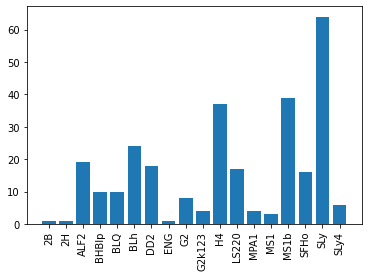

In [8]:
fig, ax = idb.show('id_eos', to_float=False) 

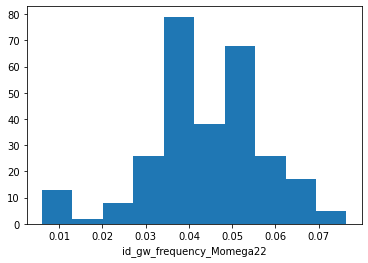

In [9]:
fig, ax = idb.show('id_gw_frequency_Momega22', to_float=True) 

**Note that the index contains only a subset of all the available metadata for each simulation.** We can find a group of simulations based on these metadata using usual dictionary manipulation:

In [10]:
key = 'id_eos'
val = 'DD2'
mdl_id_eos_DD2 = [i for i in idb.index if i.data[key]== val] # list of metadata(dictionaries)

# show metadata for these runs
for md in mdl_id_eos_DD2:
    for k, v in md.data.items():
        print('  {} = {}'.format(k,v))
        

  database_key = THC:0010
  available_runs = R01
  simulation_name = DD2_1.200_1.200_0.00_0.00_0.047
  binary_type = BNS
  reference_bibkeys = Radice:2016rys Radice:2017lry
  id_code = LORENE
  id_type = Irrotational
  id_mass = 2.4
  id_rest_mass = 2.59384
  id_mass_ratio = 1.0
  id_ADM_mass = 2.38178
  id_ADM_angularmomentum = 5.75981
  id_gw_frequency_Hz = 633.08
  id_gw_frequency_Momega22 = 0.0470247001245
  id_eos = DD2
  id_kappa2T = 302.2965055328028
  id_Lambda = 1612.2480295082828
  id_eccentricity = 
  id_mass_starA = 1.2
  id_rest_mass_starA = 1.29692
  id_spin_starA = 0, 0, 0
  id_LoveNum_kell_starA = 0.10752, 0.02943, 0.01096
  id_Lambdaell_starA = 1612.2480295082821, 4859.330076873647, 14233.516050669448
  id_mass_starB = 1.2
  id_rest_mass_starB = 1.29692
  id_spin_starB = 0, 0, 0
  id_LoveNum_kell_starB = 0.10752, 0.02943, 0.01096
  id_Lambdaell_starB = 1612.2480295082821, 4859.330076873647, 14233.516050669448
  evolution_code = None
  grid_refinement_levels = None
  gr

The relative dbkeys are

In [11]:
dbkeys_id_eos_DD2 = [md.data['database_key'] for md in mdl_id_eos_DD2]

print(dbkeys_id_eos_DD2)

['THC:0010', 'THC:0011', 'THC:0012', 'THC:0013', 'THC:0014', 'THC:0015', 'THC:0016', 'THC:0017', 'THC:0040', 'THC:0041', 'THC:0042', 'THC:0043', 'THC:0047', 'THC:0048', 'THC:0055', 'THC:0066', 'THC:0071', 'THC:0072']


We could now sync use the local DB with the entire CoRe DB:

In [12]:
#cdb.sync(lfs=True, verbose=False) # this takes some time ...

But if only a subset of simulations are required, we can clone only the relative repositories. We can enforce the syncronization of a subset of simulations by passing explicitly the `dbkeys` argument:

In [13]:
cdb.sync(dbkeys=dbkeys_id_eos_DD2, verbose=False, lfs=True, prot='https')
#cdb.sync(dbkeys=['THC:0001'],verbose=False, lfs=True, prot='https') # To sync only one simulation

git-pull THC_0010 ...
done!
git-pull THC_0011 ...
done!
git-pull THC_0012 ...
done!
git-pull THC_0013 ...
done!
git-pull THC_0014 ...
done!
git-pull THC_0015 ...
done!
git-pull THC_0016 ...
done!
git-pull THC_0017 ...
done!
git-pull THC_0040 ...
done!
git-pull THC_0041 ...
done!
git-pull THC_0042 ...
done!
git-pull THC_0043 ...
done!
git-pull THC_0047 ...
done!
git-pull THC_0048 ...
done!
git-pull THC_0055 ...
done!
git-pull THC_0066 ...
done!
git-pull THC_0071 ...
done!
git-pull THC_0072 ...
done!
 Found R01
Found THC:0012
 Found R01
Found THC:0015
 Found R02
 Found R01
Found THC:0071
 Found R01
Found THC:0017
 Found R02
 Found R01
Found THC:0041
skip core_database_index, not a DB key
 Found R02
 Found R01
Found THC:0048
 Found R01
Found THC:0066
 Found R02
 Found R01
Found THC:0042
 Found R02
 Found R01
Found THC:0047
 Found R02
 Found R01
Found THC:0013
 Found R01
Found THC:0014
 Found R02
 Found R01
Found THC:0072
 Found R01
Found THC:0010
 Found R03
 Found R02
 Found R01
Found THC

The object `cdb` has inside a list of `CoRe_sim()` objects labelled by the `database_key`. Each  `CoRe_sim()` object contains metadata and data of all the runs of a simulation, i.e. the content of one of the git repo in the CoRe DB group.

In [14]:
sim = cdb.sim

# see also 2. below
print(sim.keys())

print(sim['THC:0013'].run)

print(sim['THC:0013'].run['R01'])
print(sim['THC:0013'].run['R01'].data) # now you can work with this!
print(sim['THC:0013'].run['R01'].md) # now you can work with this!

dict_keys(['THC:0012', 'THC:0015', 'THC:0071', 'THC:0017', 'THC:0041', 'THC:0048', 'THC:0066', 'THC:0042', 'THC:0047', 'THC:0013', 'THC:0014', 'THC:0072', 'THC:0010', 'THC:0043', 'THC:0016', 'THC:0040', 'BAM:0066', 'THC:0055', 'THC:0011'])
{'R02': <watpy.coredb.coredb.CoRe_run object at 0x7f645be69af0>, 'R01': <watpy.coredb.coredb.CoRe_run object at 0x7f645be699d0>}


We now have the data we want.

# 2 Get the CoRe DB data

Now, lets see better how to what is inside one simulation object:

In [15]:
thc13 = sim['THC:0013']

# metadata of this simulation - common data for all runs, from metadata_main.txt
for k, v in thc13.md.data.items():
    print('  {} = {}'.format(k,v))

  database_key = THC:0013
  available_runs = R01, R02
  simulation_name = DD2_1.350_1.350_0.00_0.00_0.055
  binary_type = BNS
  reference_bibkeys = Radice:2016rys Radice:2017lry
  id_code = LORENE
  id_type = Irrotational
  id_mass = 2.7
  id_rest_mass = 2.94554
  id_mass_ratio = 1.0
  id_ADM_mass = 2.67288
  id_ADM_angularmomentum = 7.01514
  id_gw_frequency_Hz = 663.58
  id_gw_frequency_Momega22 = 0.0554514940011
  id_eos = DD2
  id_kappa2T = 159.0084296249798
  id_Lambda = 848.0449579998918
  id_eccentricity = 
  id_mass_starA = 1.35
  id_rest_mass_starA = 1.47277
  id_spin_starA = 0, 0, 0
  id_LoveNum_kell_starA = 0.09996, 0.0269, 0.00984
  id_Lambdaell_starA = 848.0449579998921, 2001.0063178210328, 4584.234164607441
  id_mass_starB = 1.35
  id_rest_mass_starB = 1.47277
  id_spin_starB = 0, 0, 0
  id_LoveNum_kell_starB = 0.09996, 0.0269, 0.00984
  id_Lambdaell_starB = 848.0449579998921, 2001.0063178210328, 4584.234164607441
  evolution_code = None
  grid_refinement_levels = None
  

The runs available for this simulation:

In [16]:
print(thc13.run.keys())

dict_keys(['R02', 'R01'])


Each run is a `CoRe_run()` object that contains the metadata for the run and the actual data. The metadata is as usual

In [17]:
thc13_r01 = thc13.run['R01']

# metadata of this simulation run - note this has more info, from metadata.txt
for k, v in thc13_r01.md.data.items():
    print('  {} = {}'.format(k,v))

  database_key = THC:0013:R01
  available_runs = None
  simulation_name = DD2_1.350_1.350_0.00_0.00_0.055_0.083
  binary_type = BNS
  reference_bibkeys = Radice:2016rys Radice:2017lry
  id_code = LORENE
  id_type = Irrotational
  id_mass = 2.7
  id_rest_mass = 2.94554
  id_mass_ratio = 1.0
  id_ADM_mass = 2.67288
  id_ADM_angularmomentum = 7.01514
  id_gw_frequency_Hz = 663.58
  id_gw_frequency_Momega22 = 0.0554514940011
  id_eos = DD2
  id_kappa2T = 159.0084296249798
  id_Lambda = 848.0449579998918
  id_eccentricity = 
  id_mass_starA = 1.35
  id_rest_mass_starA = 1.47277
  id_spin_starA = 0, 0, 0
  id_LoveNum_kell_starA = 0.09996, 0.0269, 0.00984
  id_Lambdaell_starA = 848.0449579998921, 2001.0063178210328, 4584.234164607441
  id_mass_starB = 1.35
  id_rest_mass_starB = 1.47277
  id_spin_starB = 0, 0, 0
  id_LoveNum_kell_starB = 0.09996, 0.0269, 0.00984
  id_Lambdaell_starB = 848.0449579998921, 2001.0063178210328, 4584.234164607441
  evolution_code = THC
  grid_refinement_levels = 7


The actual data are stored in a `CoRe_h5()` object that allows us to easily read (write) from (to) the HDF5 format. For example, we can dump the HDF5 data into `.txt` files. We can choose what to extract ($h$, $\Psi_4$ or the energetics of the waveform) or just extract everything in the same directory where the original HDF5 archive was stored. The `.txt` files can now be loaded with any python routine (or with the `wave` classes of watpy).

In [18]:
# h5 data file
print(thc13_r01.data)
print(thc13_r01.data.dfile)

# extract to txt
thc13_r01.data.write_strain_to_txt() 
thc13_r01.data.write_psi4_to_txt()
thc13_r01.data.write_EJ_to_txt()

# or all three in one:
#r01.h5.extract_all()

data.h5


**NOTE: The extracted files are not meant to be tracked by the CoRe DB repo and should not be added to any commit.**
The `CoRe_run` object can help you to delete the `.txt` files as follows:

In [19]:
#thc13_r01.clean_txt() # delete files extracted from the HDF5

The `CoRe_h5()` object has also routines to directly read the data at the chosen extraction radius. If no radius is given, or if the selected radius is not within the available ones, the largest is chosen by default. So, one can finally see the data:

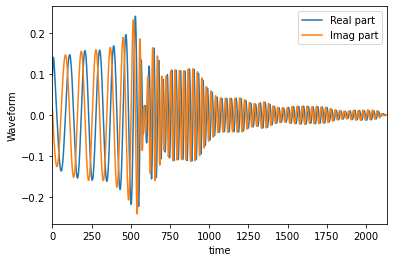

In [20]:
fig, ax = thc13_r01.data.show('rh_22')

Finally, we can check the content of the HDF5 and import the dataset as a numpy array:

energy
energy/EJ_r00400.txt
rh_00
rh_00/Rh_l0_m0_r00400.txt
rh_10
rh_10/Rh_l1_m0_r00400.txt
rh_11
rh_11/Rh_l1_m1_r00400.txt
rh_20
rh_20/Rh_l2_m0_r00400.txt
rh_21
rh_21/Rh_l2_m1_r00400.txt
rh_22
rh_22/Rh_l2_m2_r00400.txt
rh_30
rh_30/Rh_l3_m0_r00400.txt
rh_31
rh_31/Rh_l3_m1_r00400.txt
rh_32
rh_32/Rh_l3_m2_r00400.txt
rh_33
rh_33/Rh_l3_m3_r00400.txt
rh_40
rh_40/Rh_l4_m0_r00400.txt
rh_41
rh_41/Rh_l4_m1_r00400.txt
rh_42
rh_42/Rh_l4_m2_r00400.txt
rh_43
rh_43/Rh_l4_m3_r00400.txt
rh_44
rh_44/Rh_l4_m4_r00400.txt
rpsi4_00
rpsi4_00/Rpsi4_l0_m0_r00400.txt
rpsi4_10
rpsi4_10/Rpsi4_l1_m0_r00400.txt
rpsi4_11
rpsi4_11/Rpsi4_l1_m1_r00400.txt
rpsi4_20
rpsi4_20/Rpsi4_l2_m0_r00400.txt
rpsi4_21
rpsi4_21/Rpsi4_l2_m1_r00400.txt
rpsi4_22
rpsi4_22/Rpsi4_l2_m2_r00400.txt
rpsi4_30
rpsi4_30/Rpsi4_l3_m0_r00400.txt
rpsi4_31
rpsi4_31/Rpsi4_l3_m1_r00400.txt
rpsi4_32
rpsi4_32/Rpsi4_l3_m2_r00400.txt
rpsi4_33
rpsi4_33/Rpsi4_l3_m3_r00400.txt
rpsi4_40
rpsi4_40/Rpsi4_l4_m0_r00400.txt
rpsi4_41
rpsi4_41/Rpsi4_l4_m1_r00400.txt


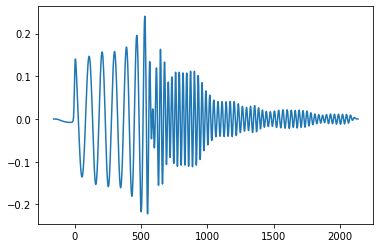

In [21]:
# check dset, h5dump -n
dset = thc13_r01.data.dump()

# import as numpy array
# 'read' is deprecated, use read_dset if possible
dset = thc13_r01.data.read('rh_22')
print(dset)

# plot it
import matplotlib.pyplot as plt
plt.plot(dset[:,0],dset[:,1])

# 3 Load waveforms from a simulation

Here we give an example on how to write metadata in CoRe format. Something like this must be done, for example, every time a new simulations needs to the added to the CoRe DB.

In [22]:
from watpy.wave.wave import *
from watpy.utils import ioutils
from watpy.utils.units import MSun_sec
import numpy as np
import os, glob

In [23]:
Msun_sec = MSun_sec() #4.925794970773135e-06

# metadata
thcsim = {}
thcsim['folder'] = './MySim_THC_135135' # simulation folder
thcsim['mass'] = 2 * 1.364 # binary mass in solar masses
thcsim['q'] = 1.0 # mass ratio, >= 1
thcsim['f0_Hz'] = 565.08 # initial GW frequency in Hz
thcsim['f0'] = thcsim['f0_Hz'] * Msun_sec
thcsim['Momg22'] = thcsim['mass'] * thcsim['f0'] / (2*np.pi) # initial GW frequency in geom. units
thcsim['massA'] = 1.364
thcsim['massB'] = 1.364
thcsim['madm'] = 2.703 # ADM mass (t=0) 
thcsim['jadm'] = 7.400 # ADM ang.mom. (t=0) 
thcsim['id_code']                  = 'LORENE'
thcsim['id_type']                  = 'Irrotational'
thcsim['id_mass']                  = 2.7
thcsim['id_rest_mass']             = 2.94554
thcsim['id_mass_ratio']            = 1.0
thcsim['id_ADM_mass']              = 2.67288
thcsim['id_ADM_angularmomentum']   = 7.01514
thcsim['id_gw_frequency_Hz']       = 663.58
thcsim['id_gw_frequency_Momega22'] = 0.0554514940011
thcsim['id_eos']                   = 'ABC'
thcsim['id_kappa2T']               = 159.0084296249798
thcsim['id_Lambda']                = 848.0449579998918
thcsim['id_eccentricity']          = None 
thcsim['id_mass_starA']            = 1.35
thcsim['id_rest_mass_starA']       = 1.47277
thcsim['id_spin_starA']            = 0, 0, 0
thcsim['id_LoveNum_kell_starA']    = 0.09996, 0.0269, 0.00984
thcsim['id_Lambdaell_starA']       = 848.0449579998921, 2001.0063178210328, 4584.234164607441
thcsim['id_mass_starB']            = 1.35
thcsim['id_rest_mass_starB']       = 1.47277

Define directory to save CoRe output data

In [24]:
thcsim['pre-release-folder'] = './MySim_THC_135135/CoReDB' # folder with CoRe formatted files

# Create CoRe output folder if needed
os.makedirs(thcsim['pre-release-folder'], exist_ok = True)

Collect all $\Psi_4$ files and define a multipolar wave with the class `mwaves()`

In [25]:
fnames = [os.path.split(x)[1] for x in glob.glob('{}/{}'.format(thcsim['folder'],'mp_Psi4_l?_m?_r400.00.asc'))]

wm = mwaves(path = thcsim['folder'], code = 'cactus', filenames = fnames, 
            mass = thcsim['mass'], f0 = thcsim['f0'], ignore_negative_m=True)

Show (2,2) strain.

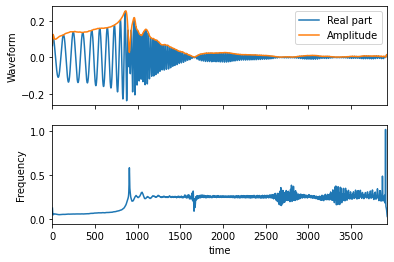

In [26]:
h22 = wm.get(l=2, m=2)
fig = h22.show_strain()

We can also check which modes are there and look at them this way:

In [27]:
print(wm.modes)

[(2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


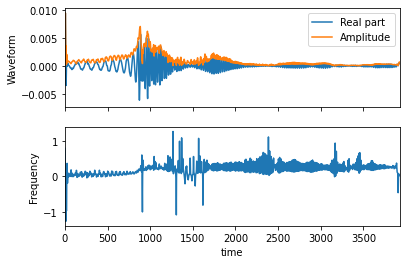

In [28]:
h32 = wm.get(l=3, m=2)
fig = h32.show_strain()

Get strain from all modes

$h_+ - i h_\times = D_L^{-1}\sum_{\ell=2}^\infty\sum_{m=-\ell}^{\ell} h_{\ell m}(t)\,{}^{-2}Y_{\ell m}(\iota,\varphi)$

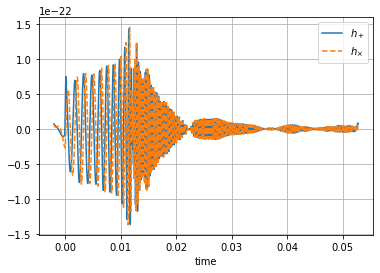

In [29]:
time, hplus, hcross = wm.hlm_to_strain()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(time, hplus, label=r'$h_+$')
ax.plot(time, hcross,'--',label=r'$h_{\times}$') 
ax.set_xlabel('time')
ax.grid()
plt.legend()
#fig.savefig("nrmodes2strain.pdf")
plt.show()

Write text files for every mode of $h_{\ell m}$.

In [30]:
for (l,m) in wm.modes:
    
        psilm = wm.get(var='Psi4',l=l, m=m)
        psilm.write_to_txt('Psi4', thcsim['pre-release-folder'])
        
        hlm = wm.get(l=l, m=m)
        hlm.write_to_txt('h', thcsim['pre-release-folder'])

Write energetics to text files.

In [31]:
wm.energetics(thcsim['massA'], thcsim['massB'], thcsim['madm'], thcsim['jadm'], 
              path_out = thcsim['pre-release-folder'])

Above, the `thcsim` dictionary is (carefully) written using (some of) the keys for the CoRe DB metadata. The latter are stored in a `CoRe_md()` object, which basically contains a dictionary. Lets see what is inside:

In [32]:
from watpy.coredb.metadata import CoRe_md

md = CoRe_md() # initialized empty
print(md.path)
print(md.data)

#md.info() # Uncomment to see the information about each key of the metadata

File metadata.txt not found
.
{'database_key': None, 'available_runs': None, 'simulation_name': None, 'binary_type': None, 'reference_bibkeys': None, 'id_code': None, 'id_type': None, 'id_mass': None, 'id_rest_mass': None, 'id_mass_ratio': None, 'id_ADM_mass': None, 'id_ADM_angularmomentum': None, 'id_gw_frequency_Hz': None, 'id_gw_frequency_Momega22': None, 'id_eos': None, 'id_kappa2T': None, 'id_Lambda': None, 'id_eccentricity': None, 'id_mass_starA': None, 'id_rest_mass_starA': None, 'id_spin_starA': None, 'id_LoveNum_kell_starA': None, 'id_Lambdaell_starA': None, 'id_mass_starB': None, 'id_rest_mass_starB': None, 'id_spin_starB': None, 'id_LoveNum_kell_starB': None, 'id_Lambdaell_starB': None, 'evolution_code': None, 'grid_refinement_levels': None, 'grid_refinement_levels_moving': None, 'grid_refinement_levels_npoints': None, 'grid_refinement_levels_moving_npoints': None, 'grid_spacing_min': None, 'grid_symmetries': None, 'grid_shells': None, 'grid_shells_radial_npoints': None, 'gr

To initialize this object we can pass a dictionary, like `thcsim`. We use the `CoRe_md()` to write such a text file, i.e. a metadata.txt:

In [33]:
md.update_fromdict(thcsim)
# md = CoRe_md(metadata = thcsim) # alternatively, (re-)initialize

# show the metadata
for k,v, in md.data.items():
    print('{} = {}'.format(k,v))

# write
md.write(path = thcsim['pre-release-folder'], fname = 'metadata.txt')

database_key = None
available_runs = None
simulation_name = None
binary_type = None
reference_bibkeys = None
id_code = LORENE
id_type = Irrotational
id_mass = 2.7
id_rest_mass = 2.94554
id_mass_ratio = 1.0
id_ADM_mass = 2.67288
id_ADM_angularmomentum = 7.01514
id_gw_frequency_Hz = 663.58
id_gw_frequency_Momega22 = 0.0554514940011
id_eos = ABC
id_kappa2T = 159.0084296249798
id_Lambda = 848.0449579998918
id_eccentricity = None
id_mass_starA = 1.35
id_rest_mass_starA = 1.47277
id_spin_starA = (0, 0, 0)
id_LoveNum_kell_starA = (0.09996, 0.0269, 0.00984)
id_Lambdaell_starA = (848.0449579998921, 2001.0063178210328, 4584.234164607441)
id_mass_starB = 1.35
id_rest_mass_starB = 1.47277
id_spin_starB = None
id_LoveNum_kell_starB = None
id_Lambdaell_starB = None
evolution_code = None
grid_refinement_levels = None
grid_refinement_levels_moving = None
grid_refinement_levels_npoints = None
grid_refinement_levels_moving_npoints = None
grid_spacing_min = None
grid_symmetries = None
grid_shells = None


## Read from CoRe formatted .txt files
The wave class can also read CoRe format, obviously.

In [34]:
fnames = [os.path.split(x)[1] for x in glob.glob('{}/{}'.format(thcsim['pre-release-folder'],'Rh_l?_m?_r*.txt'))]
print(fnames)

['Rh_l3_m3_r00400.txt', 'Rh_l3_m2_r00400.txt', 'Rh_l4_m4_r00400.txt', 'Rh_l2_m2_r00400.txt', 'Rh_l4_m2_r00400.txt', 'Rh_l2_m1_r00400.txt', 'Rh_l4_m1_r00400.txt', 'Rh_l2_m0_r00400.txt', 'Rh_l4_m0_r00400.txt', 'Rh_l3_m0_r00400.txt', 'Rh_l3_m1_r00400.txt', 'Rh_l4_m3_r00400.txt']


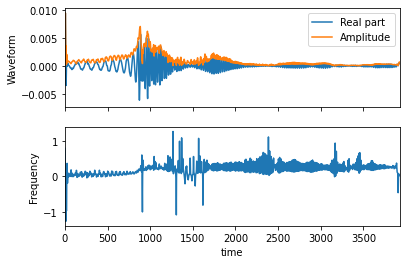

In [35]:
wm_c = mwaves(thcsim['pre-release-folder'], code = 'core', filenames = fnames, 
              mass = thcsim['mass'], f0 = thcsim['f0'], ignore_negative_m=True)
h32 = wm.get(l=3, m=2)
fig = h32.show_strain()

# 4 Computing mismatches
Compute faithfulness between two waveforms $h_1$ and $h_2$, according to [Cutler:1994ys]

$\langle h_1,h_2\rangle := 4\Re{ \int \frac{\tilde{h}_1(f)\tilde{h}^*_2(f)}{S_n(f)} }df$

where $S_n(f)$ is the power spectral density (PSD) of the detector and $\tilde{h}_1(f)$ the Fourier transform of $h_1(t)$.

In [36]:
import numpy as np
from watpy.coredb.coredb import *
from watpy.utils.num import diff1
from scipy.signal import tukey
 
# for the mismatches
from bajes.obs.gw.noise import get_design_sensitivity
from watpy.wave.gwutils import match, q_to_nu

In [37]:
Msuns  = 4.925491025543575903411922162094833998e-6
Mpc_m  = 3.085677581491367278913937957796471611e22
Msun_m = 1.476625061404649406193430731479084713e3

In [38]:
def windowing(h, alpha=0.1): 
   """ Perform windowing with Tukey window on a given strain (time-domain) 
       __________ 
       h    : strain to be tapered 
       alpha : Tukey filter slope parameter. Suggested value: alpha = 1/4/seglen 
       Only tapers beginning of wvf, to taper both, comment: window[len(h)//2:] = 1.
   """ 
   window = tukey(len(h), alpha) 
   #window[len(h)//2:] = 1. 
   wfact  = np.mean(window**2) 
   window = np.array(window) 
   return h*window, wfact

Specify `CoRe DB clone` path and a simulation.

In [39]:
sim_path    = './CoRe_DB_clone/'
dirc        = 'BAM:0066'
# Initialize DB
#cdb = CoRe_db(sim_path)
cdb.sync(dbkeys=[dirc],verbose=False, lfs=True, prot='https') # clone repo of simulation of interest
#idb = cdb.idb
sim = cdb.sim[dirc] # Simulation object
metadata = sim.md.data
M = float(metadata['id_mass'])
q = float(metadata['id_mass_ratio'])
nu = q_to_nu(q)
fmin = float(metadata['id_gw_frequency_Hz'])
distance = 1.
Njunk = 600 # To delete the radiation junk at the beginning of the simulation

git-pull BAM_0066 ...
done!
 Found R01
Found THC:0012
 Found R01
Found THC:0015
 Found R02
 Found R01
Found THC:0071
 Found R01
Found THC:0017
 Found R02
 Found R01
Found THC:0041
skip core_database_index, not a DB key
 Found R02
 Found R01
Found THC:0048
 Found R01
Found THC:0066
 Found R02
 Found R01
Found THC:0042
 Found R02
 Found R01
Found THC:0047
 Found R02
 Found R01
Found THC:0013
 Found R01
Found THC:0014
 Found R02
 Found R01
Found THC:0072
 Found R01
Found THC:0010
 Found R03
 Found R02
 Found R01
Found THC:0043
 Found R02
 Found R01
Found THC:0016
 Found R01
Found THC:0040
 Found R03
 Found R02
 Found R04
 Found R01
Found BAM:0066
 Found R02
 Found R01
Found THC:0055
 Found R01
Found THC:0011


Now we extract the waveforms we want to compare, that would be the highest (R01) and the second highest (R02) resolutions.

In [40]:
# R01
run1 =   sim.run['R01']
datah5 = run1.data
dseth5 = datah5.read_dset()
rh22_files = list(dseth5['rh_22'].keys())[0] # different distances, take smallest distance
dset = dseth5['rh_22'][rh22_files] 
t11           = dset[:,0][Njunk:] # u/M : retarded time
Reh11        = dset[:,1][Njunk:] # Reh/M
Imh1        = dset[:,2][Njunk:] # Imh/M
amp1         = dset[:,4][Njunk:] # A/M 
phase1       = -np.unwrap(np.angle(Reh11 + 1j*Imh1)) 
freq1        = np.abs(np.diff(phase1)/np.diff(t11))#diff1(t11,phase1)

# R02
run2 =   sim.run['R02']
datah5 = run2.data
dseth5 = datah5.read_dset()
rh22_files = list(dseth5['rh_22'].keys())[0] # different distances, take smallest distance
dset = dseth5['rh_22'][rh22_files] 
Reh22        = dset[:,1][Njunk:] # Reh/M
Imh2        = dset[:,2][Njunk:] # Imh/M

We convert the necessary quantities to physical units

In [41]:
fmrg         = freq1[np.argmax(amp1)]/(2*np.pi*M*Msuns) # for SI units
Reh1 = nu * Reh11 * (M*Msun_m)/(distance*Mpc_m)
Reh2 = nu * Reh22 * (M*Msun_m)/(distance*Mpc_m)

# Sample time
dT = 1. /4096
t1 = np.array(range(len(Reh11)))*dT
t2 = np.array(range(len(Reh22)))*dT

We need to obtain now the PSD (Power Spectral Density), which integrated over all positive frequencies gives the mean square amplitude of the noise in the detector. 
(See https://dcc.ligo.org/public/0114/P1400129/003/noise_curve.pdf Figure A2 for more information)

Obtain PSD from the python library PyCBC:
http://pycbc.org/pycbc/latest/html/index.html

Install PyCBC with `pip install pycbc`

In [44]:
from pycbc.psd import get_lalsim_psd_list

# List the available analytic psds
print(get_lalsim_psd_list())

['AdVBNSOptimizedSensitivityP1200087', 'AdVDesignSensitivityP1200087', 'AdVEarlyHighSensitivityP1200087', 'AdVEarlyLowSensitivityP1200087', 'AdVLateHighSensitivityP1200087', 'AdVLateLowSensitivityP1200087', 'AdVMidHighSensitivityP1200087', 'AdVMidLowSensitivityP1200087', 'AdvVirgo', 'CosmicExplorerP1600143', 'CosmicExplorerPessimisticP1600143', 'CosmicExplorerWidebandP1600143', 'EinsteinTelescopeP1600143', 'GEO', 'GEOHF', 'KAGRA', 'KAGRADesignSensitivityT1600593', 'KAGRAEarlySensitivityT1600593', 'KAGRALateSensitivityT1600593', 'KAGRAMidSensitivityT1600593', 'KAGRAOpeningSensitivityT1600593', 'TAMA', 'Virgo', 'aLIGOAPlusDesignSensitivityT1800042', 'aLIGOAdVO3LowT1800545', 'aLIGOAdVO4IntermediateT1800545', 'aLIGOAdVO4T1800545', 'aLIGOBHBH20Deg', 'aLIGOBHBH20DegGWINC', 'aLIGOBNSOptimizedSensitivityP1200087', 'aLIGODesignSensitivityP1200087', 'aLIGOEarlyHighSensitivityP1200087', 'aLIGOEarlyLowSensitivityP1200087', 'aLIGOHighFrequency', 'aLIGOHighFrequencyGWINC', 'aLIGOKAGRA128MpcT1800545'

As an example, let's choose LIGO and Einstein Telescope.

In [45]:
from pycbc.psd import aLIGODesignSensitivityP1200087, EinsteinTelescopeP1600143

deltaf = 1.0 / t1[-1]
flen    = len(Reh1)//2 + 1
psd_L1     = aLIGODesignSensitivityP1200087(flen, deltaf, fmin)
psd_ET     = EinsteinTelescopeP1600143(flen, deltaf, fmin)

fmin =  427.2679 , fmrg =  1801.3387380840381


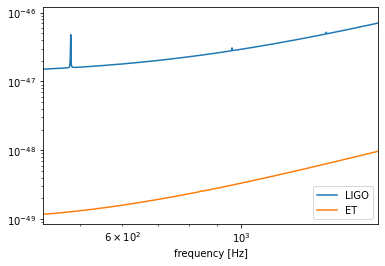

In [ ]:
# We can visualize the PSD
plt.plot(psd_L1.sample_frequencies,psd_L1,label='LIGO')
plt.plot(psd_ET.sample_frequencies,psd_ET,label='ET')
plt.xlim([fmin,fmrg])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency [Hz]')
plt.legend()
plt.plot()

print('fmin = ',fmin,', fmrg = ',fmrg)

And taper our waveforms

In [46]:
# Tapering
alpha=0.001
L = t1[-1] # length of signal in seconds
Reh1, _ = windowing(Reh1, alpha/L)
L = t2[-1]
Reh2, _ = windowing(Reh2, alpha/L)

Everything is now ready to compute the match (faithfulness):

In [47]:
m = match(t1, Reh1, t2, Reh2, fpsd=psd_L1.sample_frequencies, psd=psd_L1, fmin=fmin, fmax=fmrg, df=deltaf)
print("fmin =",fmin, ' fmax= ',fmrg,", unfaithfulness = ",1.-m)

fmin = 427.2679  fmax=  1801.3387380840381 , unfaithfulness =  3.332819616985727e-05


If we use the ET PSD we obtain instead:

In [48]:
m = match(t1, Reh1, t2, Reh2, fpsd=psd_ET.sample_frequencies, psd=psd_ET, fmin=fmin, fmax=fmrg, df=deltaf)
print("fmin =",fmin, ' fmax= ',fmrg,", unfaithfulness = ",1.-m)

fmin = 427.2679  fmax=  1801.3387380840381 , unfaithfulness =  3.055724561129569e-05
